# Exploratory Analysis & Predicting Data Science Salaries from a Survey Dataset

In [ ]:
# Import the libraries first

import numpy as np
import pandas as pd
import seaborn as sns
import sklearn
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


# We will use matplotlib to plot figures
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import plotly.express as px
import seaborn as sns

# For regression analysis we will use the statsmodels package
import statsmodels.formula.api as sm

# For visual inspection of the regression models
from statsmodels.graphics.regressionplots import plot_regress_exog, plot_fit, plot_leverage_resid2, influence_plot

#Data Preprocessing
from sklearn.preprocessing import LabelEncoder

import io
import scipy.stats as stats

from sklearn.svm import LinearSVR
from sklearn import ensemble
from sklearn.model_selection import learning_curve

In [2]:
Salaries = pd.read_csv('ds_salaries.csv')

In [3]:
Salaries.head(20)

work_year experience_level employment_type                 job_title  \
0        2023               SE              FT  Principal Data Scientist   
1        2023               MI              CT               ML Engineer   
2        2023               MI              CT               ML Engineer   
3        2023               SE              FT            Data Scientist   
4        2023               SE              FT            Data Scientist   
5        2023               SE              FT         Applied Scientist   
6        2023               SE              FT         Applied Scientist   
7        2023               SE              FT            Data Scientist   
8        2023               SE              FT            Data Scientist   
9        2023               SE              FT            Data Scientist   
10       2023               SE              FT            Data Scientist   
11       2023               SE              FT              Data Analyst   
12       2023               SE              FT              Data Analyst   
13       2023               EN              FT         Applied Scientist   
14       2023               EN              FT         Applied Scientist   
15       2023               SE              FT              Data Modeler   
16       2023               SE              FT              Data Modeler   
17       2023               SE              FT            Data Scientist   
18       2023               SE              FT            Data Scientist   
19       2023               MI              FT              Data Analyst   

    salary salary_currency  salary_in_usd employee_residence  remote_ratio  \
0    80000             EUR          85847                 ES           100   
1    30000             USD          30000                 US           100   
2    25500             USD          25500                 US           100   
3   175000             USD         175000                 CA           100   
4   120000             USD         120000                 CA           100   
5   222200             USD         222200                 US             0   
6   136000             USD         136000                 US             0   
7   219000             USD         219000                 CA             0   
8   141000             USD         141000                 CA             0   
9   147100             USD         147100                 US             0   
10   90700             USD          90700                 US             0   
11  130000             USD         130000                 US           100   
12  100000             USD         100000                 US           100   
13  213660             USD         213660                 US             0   
14  130760             USD         130760                 US             0   
15  147100             USD         147100                 US             0   
16   90700             USD          90700                 US             0   
17  170000             USD         170000                 US             0   
18  150000             USD         150000                 US             0   
19  150000             USD         150000                 US           100   

   company_location company_size  
0                ES            L  
1                US            S  
2                US            S  
3                CA            M  
4                CA            M  
5                US            L  
6                US            L  
7                CA            M  
8                CA            M  
9                US            M  
10               US            M  
11               US            M  
12               US            M  
13               US            L  
14               US            L  
15               US            M  
16               US            M  
17               US            M  
18               US            M  
19               US            M

## Data Preparation

In [4]:
Salaries.shape

(3755, 11)

In [5]:
Salaries.columns

Index(['work_year', 'experience_level', 'employment_type', 'job_title',
       'salary', 'salary_currency', 'salary_in_usd', 'employee_residence',
       'remote_ratio', 'company_location', 'company_size'],
      dtype='object')

In [6]:
Salaries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


In [7]:
Salaries.duplicated().sum()

1171

In [8]:
#drop the duplicated rows
Salaries = Salaries.drop_duplicates()

In [9]:
Salaries.duplicated().sum()

0

In [10]:
# Reset Index
Salaries = Salaries.reset_index(drop=True)

In [11]:
Salaries.isnull().value_counts()

work_year  experience_level  employment_type  job_title  salary  salary_currency  salary_in_usd  employee_residence  remote_ratio  company_location  company_size
False      False             False            False      False   False            False          False               False         False             False           2584
dtype: int64

In [12]:
Salaries.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [13]:
Salaries.describe()

work_year        salary  salary_in_usd  remote_ratio
count  2584.000000  2.584000e+03    2584.000000   2584.000000
mean   2022.301084  2.103653e+05  133409.280186     50.483746
std       0.749179  8.080375e+05   67136.837329     48.163707
min    2020.000000  6.000000e+03    5132.000000      0.000000
25%    2022.000000  9.000000e+04   84975.000000      0.000000
50%    2022.000000  1.346300e+05  130000.000000     50.000000
75%    2023.000000  1.825625e+05  175000.000000    100.000000
max    2023.000000  3.040000e+07  450000.000000    100.000000

In [14]:
#checking for unique values in each column
Salaries.nunique()

work_year                4
experience_level         4
employment_type          4
job_title               93
salary                 815
salary_currency         20
salary_in_usd         1035
employee_residence      78
remote_ratio             3
company_location        72
company_size             3
dtype: int64

In [15]:
#printing unique values of categorical variables
for column in ['company_size','remote_ratio','work_year','experience_level','employment_type','company_location','job_title']:
    print(Salaries[column].unique())

['L' 'S' 'M']
[100   0  50]
[2023 2022 2020 2021]
['SE' 'MI' 'EN' 'EX']
['FT' 'CT' 'FL' 'PT']
['ES' 'US' 'CA' 'DE' 'GB' 'NG' 'IN' 'HK' 'NL' 'CH' 'CF' 'FR' 'FI' 'UA'
 'IE' 'IL' 'GH' 'CO' 'SG' 'AU' 'SE' 'SI' 'MX' 'BR' 'PT' 'RU' 'TH' 'HR'
 'VN' 'EE' 'AM' 'BA' 'KE' 'GR' 'MK' 'LV' 'RO' 'PK' 'IT' 'MA' 'PL' 'AL'
 'AR' 'LT' 'AS' 'CR' 'IR' 'BS' 'HU' 'AT' 'SK' 'CZ' 'TR' 'PR' 'DK' 'BO'
 'PH' 'BE' 'ID' 'EG' 'AE' 'LU' 'MY' 'HN' 'JP' 'DZ' 'IQ' 'CN' 'NZ' 'CL'
 'MD' 'MT']
['Principal Data Scientist' 'ML Engineer' 'Data Scientist'
 'Applied Scientist' 'Data Analyst' 'Data Modeler' 'Research Engineer'
 'Analytics Engineer' 'Business Intelligence Engineer'
 'Machine Learning Engineer' 'Data Strategist' 'Data Engineer'
 'Computer Vision Engineer' 'Data Quality Analyst'
 'Compliance Data Analyst' 'Data Architect'
 'Applied Machine Learning Engineer' 'AI Developer' 'Research Scientist'
 'Data Analytics Manager' 'Business Data Analyst' 'Applied Data Scientist'
 'Staff Data Analyst' 'ETL Engineer' 'Data DevOp

In [16]:
Salaries[Salaries.duplicated(keep=False)].sort_values('job_title').head(10)

Empty DataFrame
Columns: [work_year, experience_level, employment_type, job_title, salary, salary_currency, salary_in_usd, employee_residence, remote_ratio, company_location, company_size]
Index: []

In [17]:
#Renaming the column
Salaries['company_size'] = Salaries['company_size'].replace({'L': 'Large', 'S': 'Small', 'M': 'Medium'})
for column in ['company_size']:
    print(Salaries[column].unique())
    
Salaries['experience_level'] = Salaries['experience_level'].replace({'EN': 'Entry-level (Junior)', 'MI': 'Mid-level (Intermediate)', 'SE': 'Senior-level (Expert)',  'EX': 'Executive-level (Director)'})
for column in ['experience_level']:
    print(Salaries[column].unique())    

Salaries['employment_type'] = Salaries['employment_type'].replace({'PT':'Part-time','CT': 'Contract','FT': 'Full-time','FL':'Freelance'})
for column in ['employment_type']:
    print(Salaries[column].unique())

Salaries['remote_ratio'] = Salaries['remote_ratio'].replace({0:'Onsite',50: 'Hybrid',100: 'Remote'})
for column in ['remote_ratio']:
    print(Salaries[column].unique())    

['Large' 'Small' 'Medium']
['Senior-level (Expert)' 'Mid-level (Intermediate)' 'Entry-level (Junior)'
 'Executive-level (Director)']
['Full-time' 'Contract' 'Freelance' 'Part-time']
['Remote' 'Onsite' 'Hybrid']


In [18]:
!pip install pycountry

In [19]:
#Transforming the "company_location" and "employee_residence" codes into descriptive names

import pycountry
def country_name(country_code):
    try:
        return pycountry.countries.get(alpha_2=country_code).name
    except:
        return 'other'

Salaries['company_location'] = Salaries['company_location'].apply(country_name)
Salaries['employee_residence'] = Salaries['employee_residence'].apply(country_name)
for column in ['company_location','employee_residence']:
    print(Salaries[column].unique())


['Spain' 'United States' 'Canada' 'Germany' 'United Kingdom' 'Nigeria'
 'India' 'Hong Kong' 'Netherlands' 'Switzerland'
 'Central African Republic' 'France' 'Finland' 'Ukraine' 'Ireland'
 'Israel' 'Ghana' 'Colombia' 'Singapore' 'Australia' 'Sweden' 'Slovenia'
 'Mexico' 'Brazil' 'Portugal' 'Russian Federation' 'Thailand' 'Croatia'
 'Viet Nam' 'Estonia' 'Armenia' 'Bosnia and Herzegovina' 'Kenya' 'Greece'
 'North Macedonia' 'Latvia' 'Romania' 'Pakistan' 'Italy' 'Morocco'
 'Poland' 'Albania' 'Argentina' 'Lithuania' 'American Samoa' 'Costa Rica'
 'Iran, Islamic Republic of' 'Bahamas' 'Hungary' 'Austria' 'Slovakia'
 'Czechia' 'Turkey' 'Puerto Rico' 'Denmark'
 'Bolivia, Plurinational State of' 'Philippines' 'Belgium' 'Indonesia'
 'Egypt' 'United Arab Emirates' 'Luxembourg' 'Malaysia' 'Honduras' 'Japan'
 'Algeria' 'Iraq' 'China' 'New Zealand' 'Chile' 'Moldova, Republic of'
 'Malta']
['Spain' 'United States' 'Canada' 'Germany' 'United Kingdom' 'Nigeria'
 'India' 'Hong Kong' 'Portugal' 'Netherla

In [20]:
for column in ['company_size','remote_ratio','work_year','experience_level','employment_type','company_location','job_title']:
    print(Salaries[column].unique())

['Large' 'Small' 'Medium']
['Remote' 'Onsite' 'Hybrid']
[2023 2022 2020 2021]
['Senior-level (Expert)' 'Mid-level (Intermediate)' 'Entry-level (Junior)'
 'Executive-level (Director)']
['Full-time' 'Contract' 'Freelance' 'Part-time']
['Spain' 'United States' 'Canada' 'Germany' 'United Kingdom' 'Nigeria'
 'India' 'Hong Kong' 'Netherlands' 'Switzerland'
 'Central African Republic' 'France' 'Finland' 'Ukraine' 'Ireland'
 'Israel' 'Ghana' 'Colombia' 'Singapore' 'Australia' 'Sweden' 'Slovenia'
 'Mexico' 'Brazil' 'Portugal' 'Russian Federation' 'Thailand' 'Croatia'
 'Viet Nam' 'Estonia' 'Armenia' 'Bosnia and Herzegovina' 'Kenya' 'Greece'
 'North Macedonia' 'Latvia' 'Romania' 'Pakistan' 'Italy' 'Morocco'
 'Poland' 'Albania' 'Argentina' 'Lithuania' 'American Samoa' 'Costa Rica'
 'Iran, Islamic Republic of' 'Bahamas' 'Hungary' 'Austria' 'Slovakia'
 'Czechia' 'Turkey' 'Puerto Rico' 'Denmark'
 'Bolivia, Plurinational State of' 'Philippines' 'Belgium' 'Indonesia'
 'Egypt' 'United Arab Emirates' 'Lu

In [21]:
#seperating numerical and categorical columns
numerical = ['work_year','salary','salary_in_usd']
categorical = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size','remote_ratio']

In [22]:
for i in Salaries[categorical].columns:
    x = Salaries[categorical][i].value_counts()
    print(i)
    print(x,'\n')

experience_level
Senior-level (Expert)         1554
Mid-level (Intermediate)       664
Entry-level (Junior)           270
Executive-level (Director)      96
Name: experience_level, dtype: int64 

employment_type
Full-time    2547
Part-time      17
Contract       10
Freelance      10
Name: employment_type, dtype: int64 

job_title
Data Engineer                598
Data Scientist               538
Data Analyst                 396
Machine Learning Engineer    206
Analytics Engineer            91
                            ... 
Compliance Data Analyst        1
Deep Learning Researcher       1
Staff Data Analyst             1
Data DevOps Engineer           1
Finance Data Analyst           1
Name: job_title, Length: 93, dtype: int64 

salary_currency
USD    2107
EUR     200
GBP     144
INR      59
CAD      25
AUD       9
SGD       6
BRL       6
PLN       5
CHF       4
HUF       3
DKK       3
JPY       3
TRY       3
THB       2
ILS       1
HKD       1
CZK       1
MXN       1
CLP       1
Name:

#### Observations:

1. Dataset has no missing values.
2. There are 1171 duplicate rows,dropped duplicate rows.
3. Renaming the values in columns experience_level,company_size,employment_type,remote_ratio for better understanding.
4. remote_ration chnaged to obj dtype after renaming the column.

In [23]:
Salaries[numerical].describe()

work_year        salary  salary_in_usd
count  2584.000000  2.584000e+03    2584.000000
mean   2022.301084  2.103653e+05  133409.280186
std       0.749179  8.080375e+05   67136.837329
min    2020.000000  6.000000e+03    5132.000000
25%    2022.000000  9.000000e+04   84975.000000
50%    2022.000000  1.346300e+05  130000.000000
75%    2023.000000  1.825625e+05  175000.000000
max    2023.000000  3.040000e+07  450000.000000

In [24]:
Salaries[categorical].describe()

experience_level employment_type      job_title salary_currency  \
count                    2584            2584           2584            2584   
unique                      4               4             93              20   
top     Senior-level (Expert)       Full-time  Data Engineer             USD   
freq                     1554            2547            598            2107   

       employee_residence company_location company_size remote_ratio  
count                2584             2584         2584         2584  
unique                 78               72            3            3  
top         United States    United States       Medium       Remote  
freq                 1893             1929         2028         1211

## Univariate Analysis

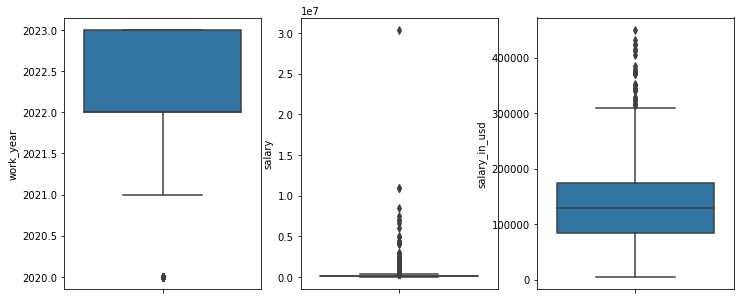

In [25]:
#plotting boxplot of numerical features 
plt.figure(figsize=(12,5))
features = numerical
for i in range(0,len(features)):
    plt.subplot(1,len(features),i+1)
    sns.boxplot(y=Salaries[features[i]])
    



1. The box plot explains that the minimum salary in data science field as USD 5132 dollars, while the maximum is USD 450k. The median salary in data science field is USD 135k.
2. few outliers are seen in work_year,salary.

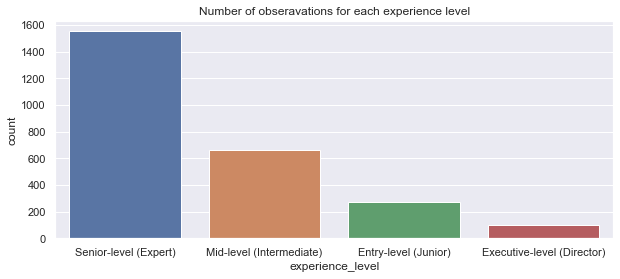

In [26]:
#Plotting counts of observations for each experience level
sns.set(rc={"figure.figsize":(10, 4)})
plt.title("Number of obseravations for each experience level")
plt.xlabel('Experiance_level')
plt.ylabel('Salary')

plot1 = sns.countplot(data=Salaries,x="experience_level")


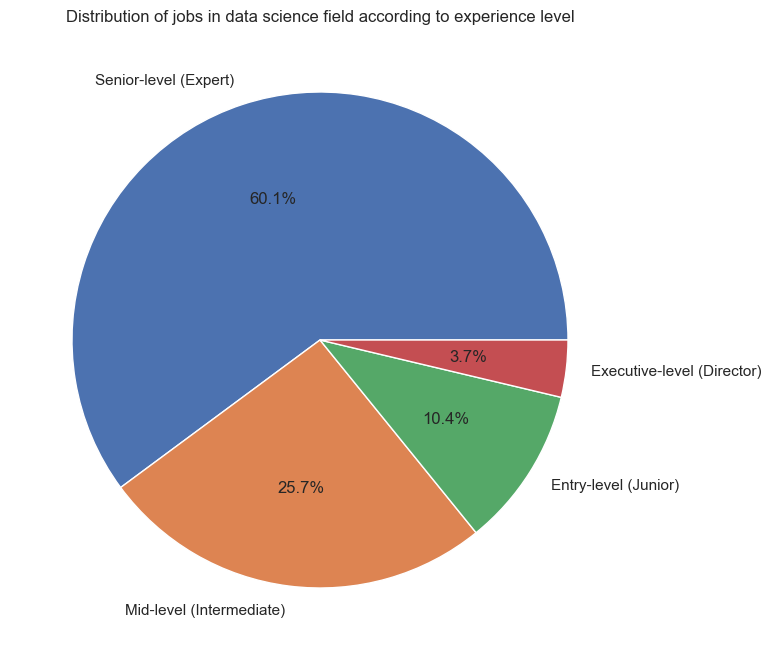

In [27]:
# Creating a pie chart for individuals in each experience level
level_counts = Salaries['experience_level'].value_counts()


plt.figure(figsize=(8,10),dpi=100)
plt.pie(level_counts.values, labels=level_counts.index, autopct='%1.1f%%')
plt.title('Distribution of jobs in data science field according to experience level')

plt.show()

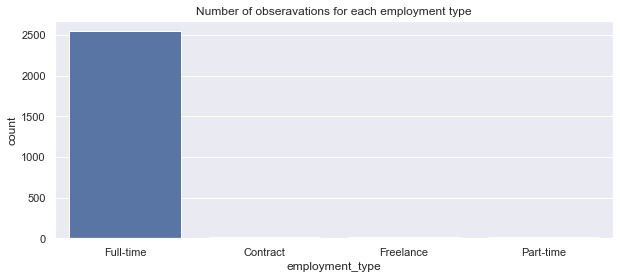

In [28]:
#Plotting counts of observations for each employment type
sns.set(rc={"figure.figsize":(10, 4)})
plt.title("Number of obseravations for each employment type")
plt.xlabel('Employment type')
plt.ylabel('Salary')

plot1 = sns.countplot(data=Salaries,x="employment_type")


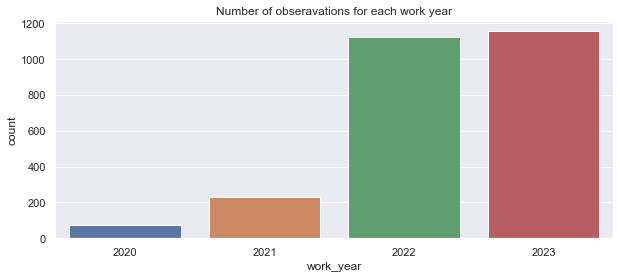

In [29]:
#Plotting counts of observations for each employment type
sns.set(rc={"figure.figsize":(10, 4)})
plt.title("Number of obseravations for each work year")
plt.xlabel('work year')
plt.ylabel('Salary')

plot1 = sns.countplot(data=Salaries,x="work_year")


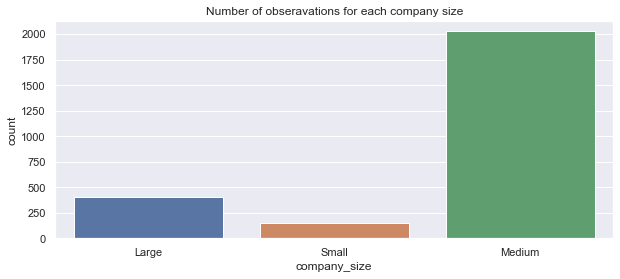

In [30]:
#Plotting counts of observations for each employment type
sns.set(rc={"figure.figsize":(10, 4)})
plt.title("Number of obseravations for each company size")
plt.xlabel('company size')
plt.ylabel('Salary')

plot1 = sns.countplot(data=Salaries,x="company_size")


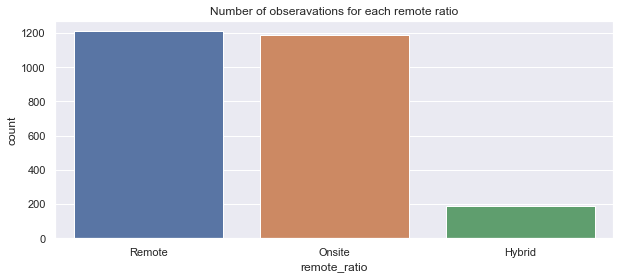

In [31]:
#Plotting counts of observations for each employment type
sns.set(rc={"figure.figsize":(10, 4)})
plt.title("Number of obseravations for each remote ratio")
plt.xlabel('Remote ratio')
plt.ylabel('Salary')

plot1 = sns.countplot(data=Salaries,x="remote_ratio")


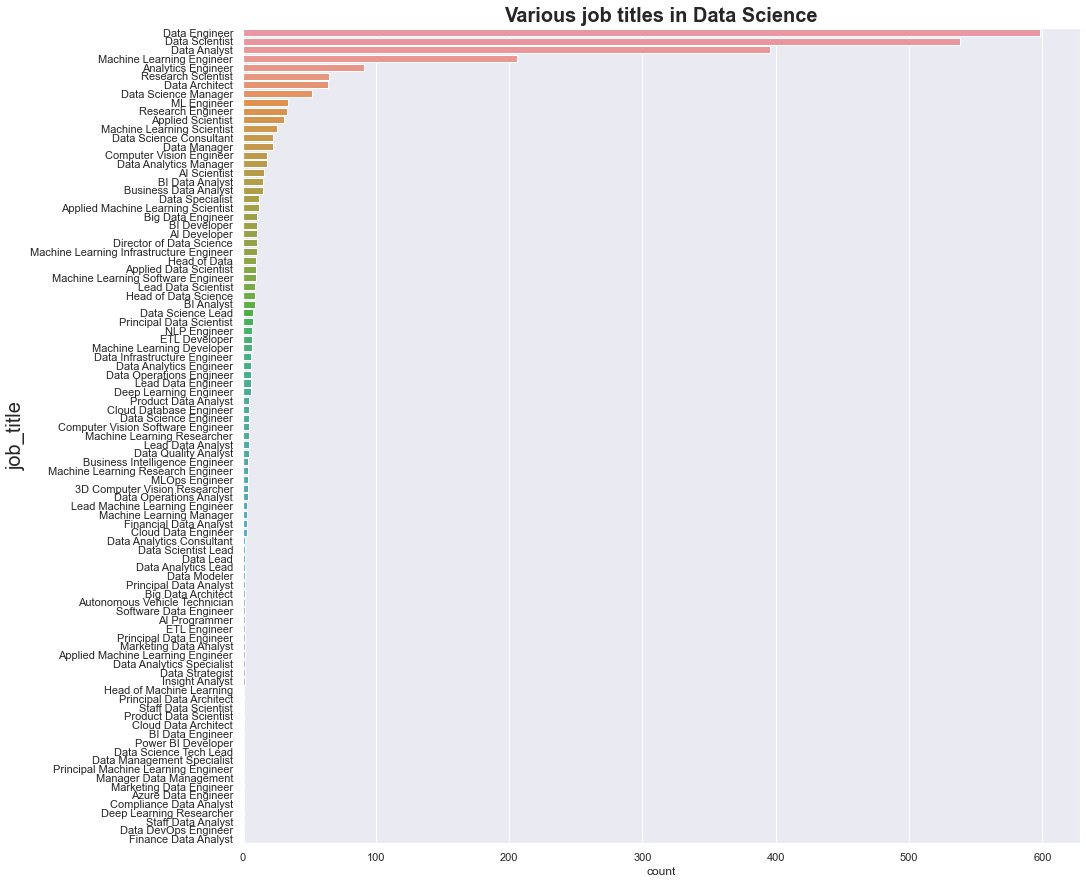

In [32]:
plt.figure(figsize = (15,15))
plt.title('Various job titles in Data Science',fontsize = 20,fontweight = 'bold')
plt.xlabel('Count')
plt.ylabel('Job titles',fontsize = 20)
plot = sns.countplot(data=Salaries,y='job_title',order=Salaries['job_title'].value_counts().index)



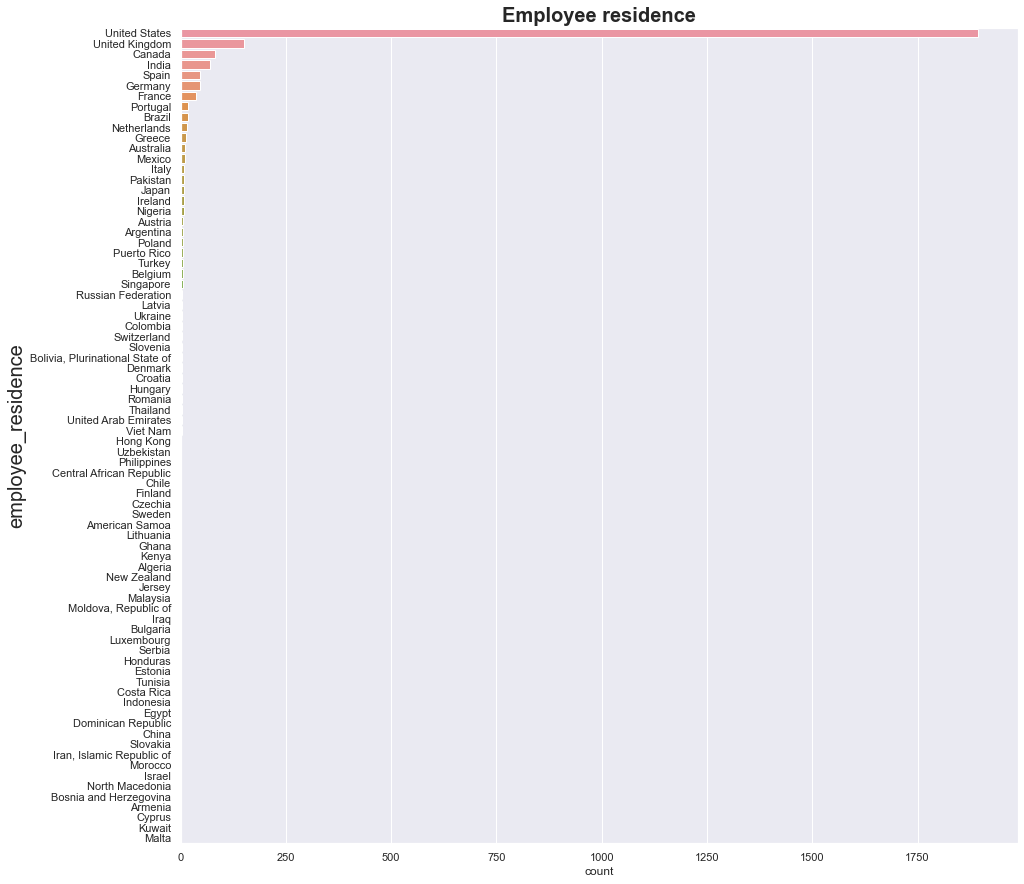

In [33]:
plt.figure(figsize = (15,15))
plt.title('Employee residence',fontsize = 20,fontweight = 'bold')
plt.xlabel('Count')
plt.ylabel('Location',fontsize = 20)
plot = sns.countplot(data=Salaries,y='employee_residence',order=Salaries['employee_residence'].value_counts().index)


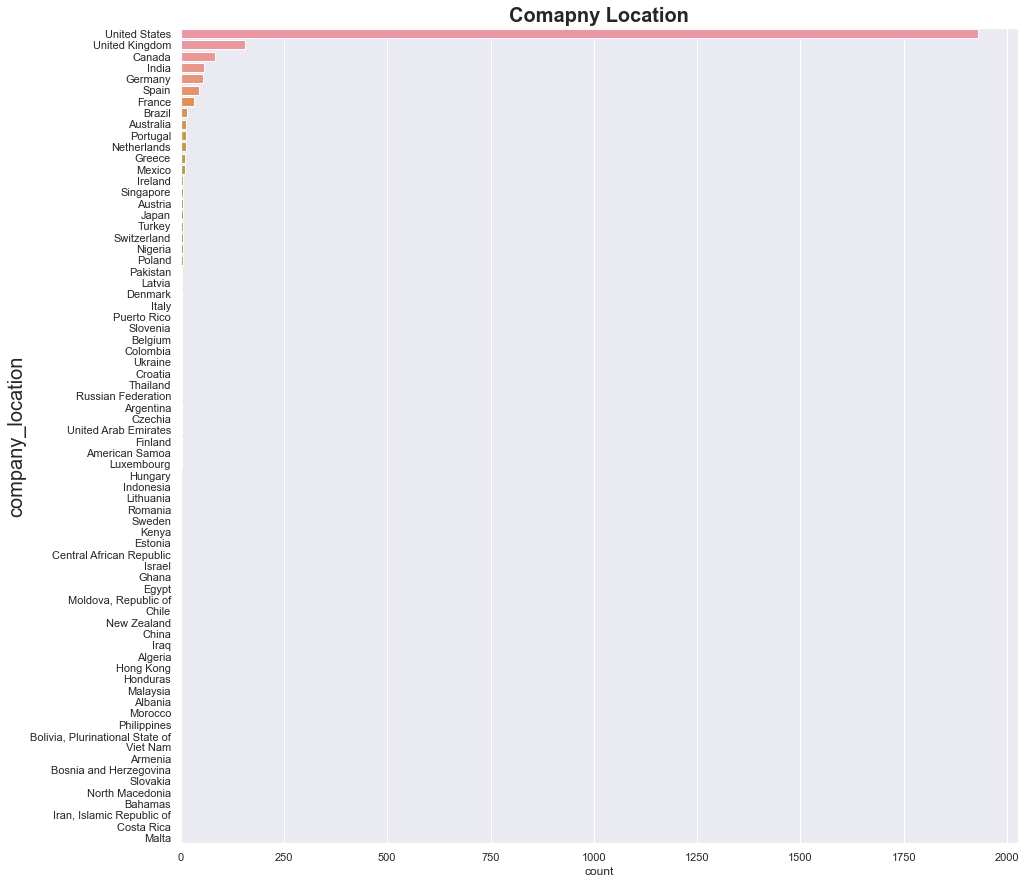

In [34]:
plt.figure(figsize = (15,15))
plt.title('Comapny Location',fontsize = 20,fontweight = 'bold')
plt.xlabel('Count')
plt.ylabel('Location',fontsize = 20)
plot = sns.countplot(data=Salaries,y='company_location',order=Salaries['company_location'].value_counts().index)


### For Employee Residence and Company location, the US is the highest in terms of frequency, followed by UK. A total of over 1900 Employees and Companies are resident in the US while other locations record values below 50 for both Employee residence and company location.

## Multivariate analysis

In [35]:
plot3=px.violin(Salaries,x='employment_type',y='salary_in_usd',box=True)
plot3.show()

 Similar to the "salary_in_usd" boxplot, this boxplot explains salary levels in data science field for different types of employment types.

### 1. Which Job has highest salary in Data science?

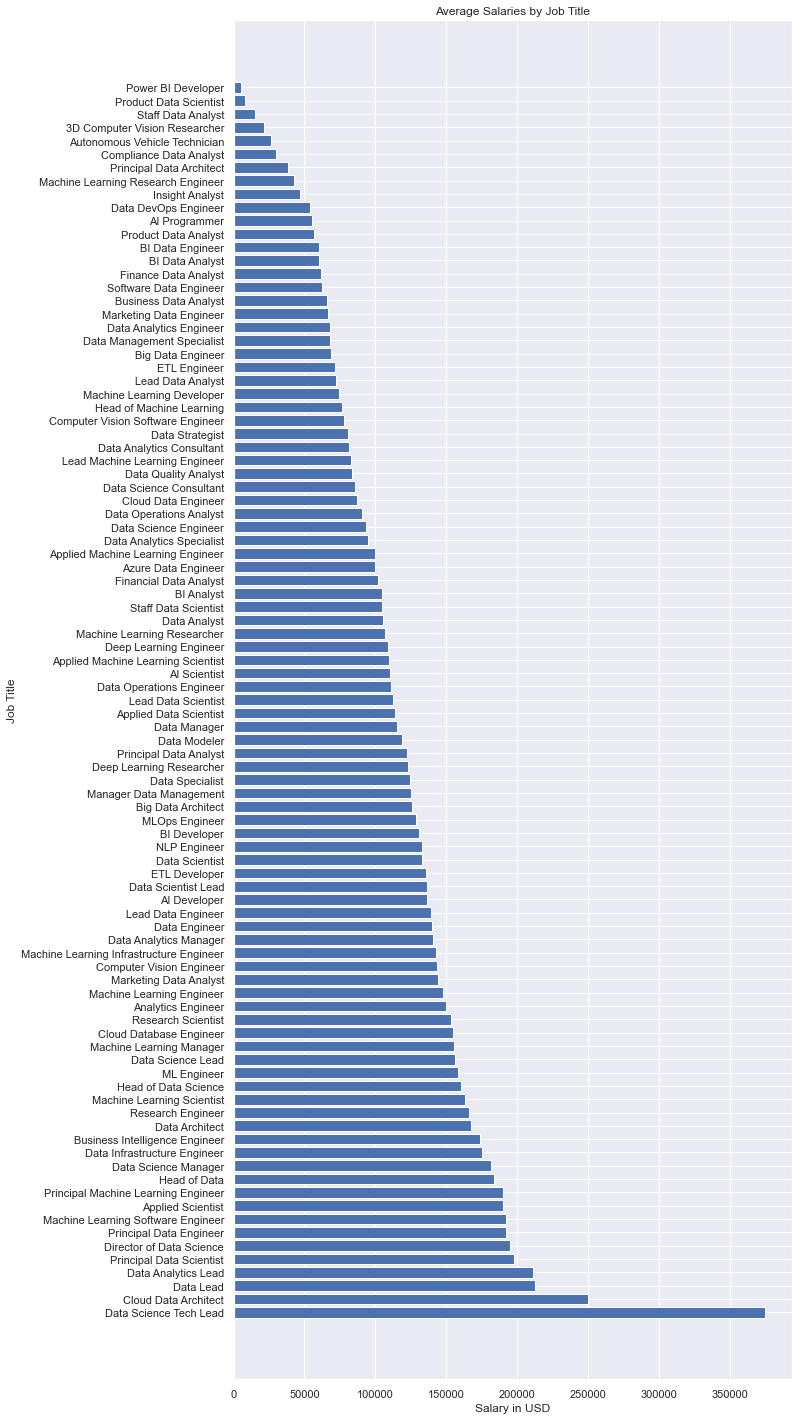

In [36]:
#mean salaries for job titles
AVG_salaries_by_job_title = Salaries.groupby('job_title')['salary_in_usd'].mean().sort_values(ascending=False)

fig, ax = plt.subplots(figsize=(10, 25))
ax.barh(AVG_salaries_by_job_title.index, AVG_salaries_by_job_title.values)
ax.set_title('Average Salaries by Job Title')
ax.set_xlabel('Salary in USD')
ax.set_ylabel('Job Title')
plt.show()

#### Observation:
1. The plot shows that highest salary by Data Science tech lead is > 400,000 USD and the lowest by Power BI developer is < 3000 USD.
2. The average salary of workers in the Data Science field is between 100,000-150,000 USD.

### 2. What are the top 10 Data Science jobs in 2023?

In [37]:
salaries_23= Salaries[ Salaries["work_year"] == 2023]
salaries_23.head()     

work_year          experience_level employment_type  \
0       2023     Senior-level (Expert)       Full-time   
1       2023  Mid-level (Intermediate)        Contract   
2       2023  Mid-level (Intermediate)        Contract   
3       2023     Senior-level (Expert)       Full-time   
4       2023     Senior-level (Expert)       Full-time   

                  job_title  salary salary_currency  salary_in_usd  \
0  Principal Data Scientist   80000             EUR          85847   
1               ML Engineer   30000             USD          30000   
2               ML Engineer   25500             USD          25500   
3            Data Scientist  175000             USD         175000   
4            Data Scientist  120000             USD         120000   

  employee_residence remote_ratio company_location company_size  
0              Spain       Remote            Spain        Large  
1      United States       Remote    United States        Small  
2      United States       Remote    United States        Small  
3             Canada       Remote           Canada       Medium  
4             Canada       Remote           Canada       Medium

In [38]:
salaries_23.job_title.value_counts().head(10)

Data Engineer                269
Data Scientist               223
Data Analyst                 195
Machine Learning Engineer    103
Analytics Engineer            41
Research Scientist            38
Data Architect                31
Research Engineer             28
Applied Scientist             20
Data Manager                  18
Name: job_title, dtype: int64

Text(0.5, 1.0, 'Top 10 Data Science Jobs in 2023')

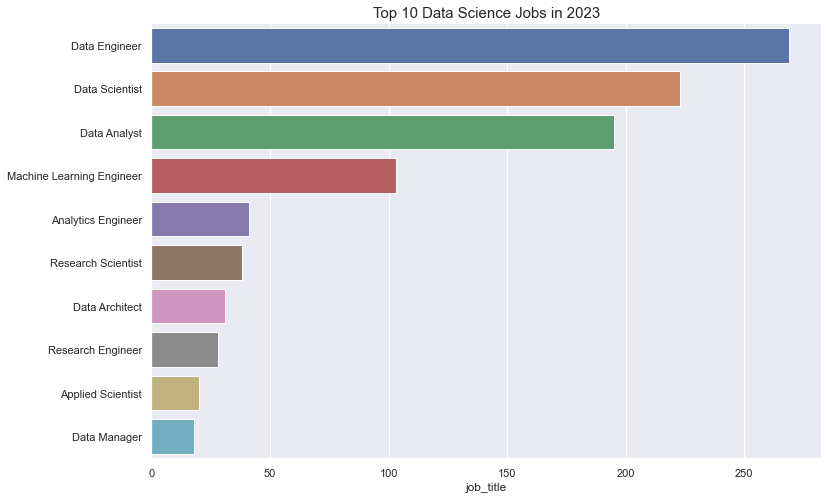

In [39]:
plt.figure(figsize = (12, 8))

# plot a bar chart
sns.barplot(x = salaries_23["job_title"].value_counts().sort_values(ascending = False).head(10), 
            y = salaries_23["job_title"].value_counts().sort_values(ascending = False).head(10).index)
plt.title('Top 10 Data Science Jobs in 2023', fontsize = 15)
     

### Observations:
1. In 2023,the top 10 Data Science jobs are shown in barplot,most popular is DATA ENGINEER.
2. Data Scientist, Data Engineer, Data Analyst are the top 3 most popular jobs based on the data.


### 3. How remote ratio vary from year 2020-2023?

Text(0.5, 1.0, 'Variation of remote ratio from 2020-2023')

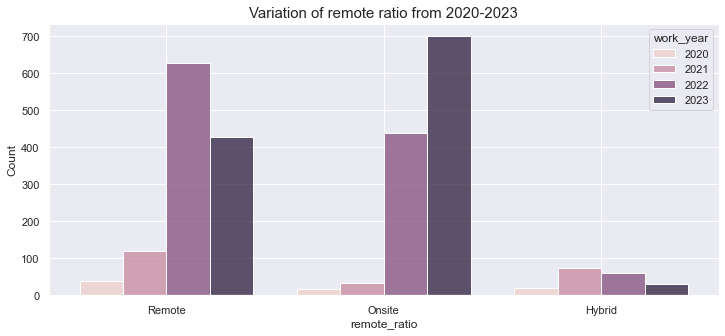

In [40]:
plt.figure(figsize = (12,5))
sns.histplot(data = Salaries,x = 'remote_ratio',hue = 'work_year',multiple = 'dodge',shrink = 0.8)
plt.title('Variation of remote ratio from 2020-2023', fontsize = 15)

### 4. Does salary of employee depends on experience level?

Text(0.5, 1.0, 'Salary in variation with exprience level')

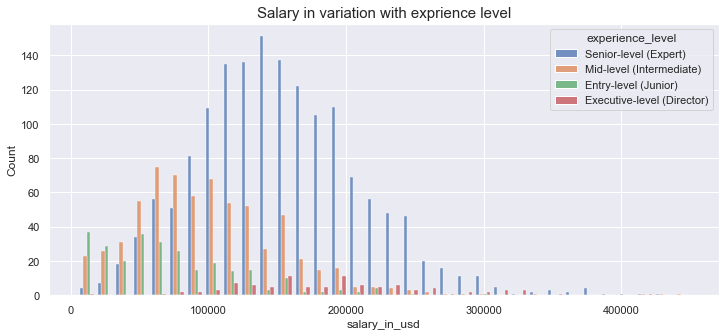

In [41]:
plt.figure(figsize = (12,5))
sns.histplot(data = Salaries,x = 'salary_in_usd',hue = 'experience_level',multiple = 'dodge',shrink = 0.8)
plt.title('Salary in variation with exprience level', fontsize = 15)

### 5. The top 20 countries with highest salaries in the Data science field?

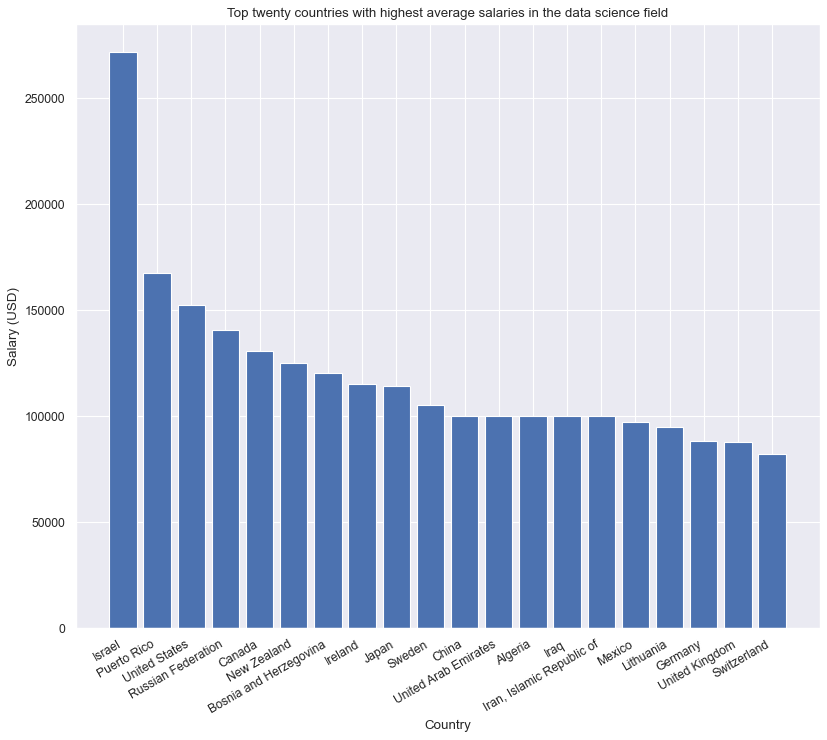

In [42]:
# Create bar chart
AVG_Salaries_by_location = Salaries.groupby('company_location')['salary_in_usd'].mean().sort_values(ascending=False)
Top_20 = AVG_Salaries_by_location.head(20)

plt.figure(figsize=(12,10),dpi=80)
plt.bar(Top_20.index, Top_20)

# Add labels to the chart
plt.xlabel('Country')
plt.ylabel('Salary (USD)')
plt.title('Top twenty countries with highest average salaries in the data science field')
plt.xticks(rotation=30, ha='right')
plt.show()

### 6. How is the distribution of Data Science worker locations?

Text(0.5, 1.0, 'Company Locations with Most Workers')

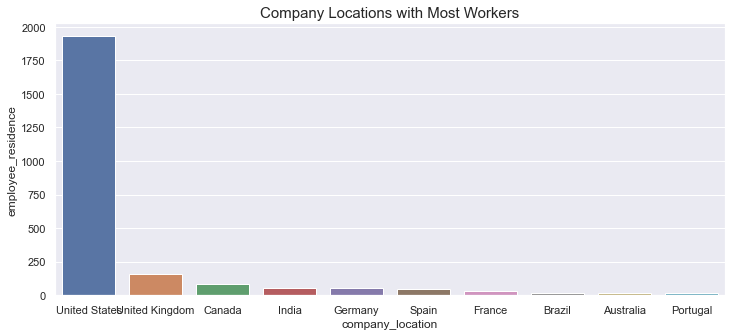

In [43]:
plt.figure(figsize = (12,5))
sns.barplot(x = Salaries.groupby("company_location")["employee_residence"].count().sort_values(ascending = False).head(10).index, 
            y = Salaries.groupby("company_location")["employee_residence"].count().sort_values(ascending = False).head(10))
plt.title("Company Locations with Most Workers", fontsize = 15)

#### Workers mostly are from United States of America companies.

In [44]:
#Correlation
Salaries_corr=Salaries.corr()
Salaries_corr

work_year    salary  salary_in_usd
work_year       1.000000 -0.099153       0.236958
salary         -0.099153  1.000000      -0.043672
salary_in_usd   0.236958 -0.043672       1.000000

<AxesSubplot:>

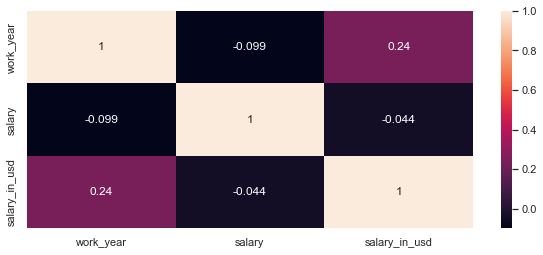

In [45]:
sns.heatmap(Salaries_corr, annot=True)

## Construction of a pipeline

duplicate data is already done in the data exploration process above thus no further actions need on removal of duplicate values

In [46]:
#importing required libraries
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [47]:
#Organizing attributes into list based on data type
#Putting salary_in_usd as a categorical attribute made the accuracy better
target = ['salary']
numerical = ['work_year']
categorical = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size','remote_ratio','salary_in_usd']

In [48]:
#pipeline for categorical data

cat_si_step = ('si', SimpleImputer(strategy='constant', fill_value='Other'))
cat_ohe_step = ('ohe', OneHotEncoder(sparse=False, handle_unknown='ignore'))
cat_steps = [cat_si_step, cat_ohe_step]
cat_pipe = Pipeline(cat_steps)
cat_transformers = [('cat', cat_pipe, categorical)]

In [49]:
#Creating pipeline for numerical data

#imputing using fill_value = median
num_si_step = ('num_si', SimpleImputer(strategy='median'))

#creating MinMaxScale for numerical data 
num_scale_step = ('num_scale', MinMaxScaler())

#creating transformers for numerical data
num_steps = [num_si_step, num_scale_step]
num_pipe = Pipeline(num_steps)
num_transformers = [('num', num_pipe, numerical)]

In [50]:
ct = ColumnTransformer(transformers=cat_transformers+num_transformers)
ct.fit(Salaries[categorical + numerical])

X = ct.transform(Salaries[categorical + numerical])
y = Salaries['salary'].values

In [51]:
#splitting test and training data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state = 5,shuffle=True)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(2067, 1313) (517, 1313) (2067,) (517,)


In [52]:
from sklearn.linear_model import Ridge,Lasso,LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import neighbors
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.svm import SVR

## Linear Regression Code

In [53]:
from sklearn.linear_model import LinearRegression

MRModel = LinearRegression()
MRModel.fit(X_train, y_train)
y_pred = MRModel.predict(X_test)


In [54]:
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test, y_pred)
rmse =np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)*100


print("Mean Squared Error:", mse)
print("R-squared Score:", r2)


Mean Squared Error: 123141541029.62383
R-squared Score: 77.36181542528062


## Random Forest Regression Code

In [55]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=200, random_state=5)
rf_model.fit(X_train, y_train)
y_pred_RF = rf_model.predict(X_test)

In [56]:
RF_mse = mean_squared_error(y_test, y_pred)
RF_r2 = r2_score(y_test, y_pred_RF)*100

print("Mean Squared Error:", RF_mse)
print("R-squared Score:", RF_r2)

Mean Squared Error: 123141541029.62383
R-squared Score: 72.96556582023666


In [57]:
dt = DecisionTreeRegressor().fit(X_train,y_train)
knn = KNeighborsRegressor().fit(X_train,y_train)
ridge=Ridge().fit(X_train,y_train)
lasso=Lasso().fit(X_train,y_train)
ada=AdaBoostRegressor().fit(X_train,y_train)
gbm=GradientBoostingRegressor().fit(X_train,y_train)

C:\Users\Yanujan\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.124e+11, tolerance: 1.405e+11



In [58]:
models = [ridge,lasso,knn,dt,ada,gbm]

In [59]:
def ML(Y,models):
    y_pred = models.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)*100
    return mse,r2


In [60]:
for i in models:
    print("\n",i,"\n\n different models success rate:",ML('salary',i))


 Ridge() 

 different models success rate: (147611479311.72162, 72.8632930360825)

 Lasso() 

 different models success rate: (149506497346.03708, 72.51491532637904)

 KNeighborsRegressor() 

 different models success rate: (287194441959.5763, 47.20253838344968)

 DecisionTreeRegressor() 

 different models success rate: (419966609753.3656, 22.79387161048525)

 AdaBoostRegressor() 

 different models success rate: (404157822602.5455, 25.700138971039255)

 GradientBoostingRegressor() 

 different models success rate: (132027657518.20291, 75.7282030509437)


#### Based on the provided evaluation metrics, the models can be ranked from best to worst performance as follows: 
GradientBoostingRegressor > LinearRegression > RandomForestRegressor > Ridge > lasso >  AdaBoostRegressor >  KNeighborsRegressor >  DecisionTreeRegressor

## Learning Curves

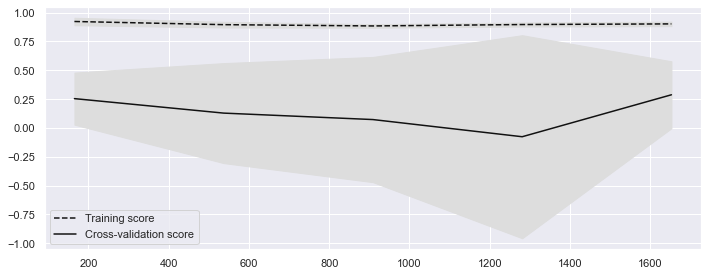

In [76]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    
    train_sizes, train_scores, test_scores = learning_curve(rf_model, X_train, y_train, n_jobs=-1)

    # Create means and standard deviations of training set scores
    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    # Create means and standard deviations of test set scores
    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    # Draw lines
    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

    # Draw bands
    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    plt.tight_layout()
    plt.legend(loc="best")
    
    return plt

title = "Random Forest Classifier Learning Curve"

estimator = RandomForestRegressor()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=10, n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

plt.show()

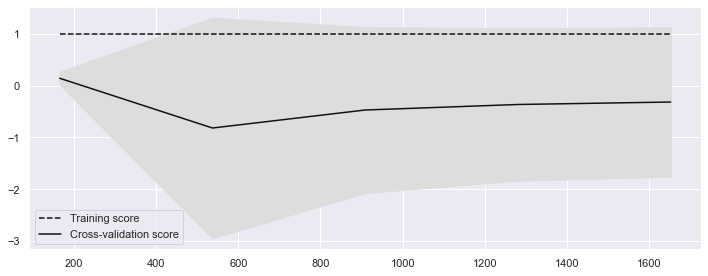

In [82]:
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):

    train_sizes, train_scores, test_scores = learning_curve(MRModel, X_train, y_train, n_jobs=-1)

    train_mean = np.mean(train_scores, axis=1)
    train_std = np.std(train_scores, axis=1)

    test_mean = np.mean(test_scores, axis=1)
    test_std = np.std(test_scores, axis=1)

    plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
    plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

    plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
    plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

    plt.tight_layout()
    plt.legend(loc="best")
    
    return plt
    
title = "Linear Regression Learning Curve"
estimator = LinearRegression()
plot_learning_curve(estimator, title, X, y, ylim=(0.7, 1.01), cv=10, n_jobs=-1, train_sizes=np.linspace(0.01, 1.0, 50))

plt.show()

## Residual Plots

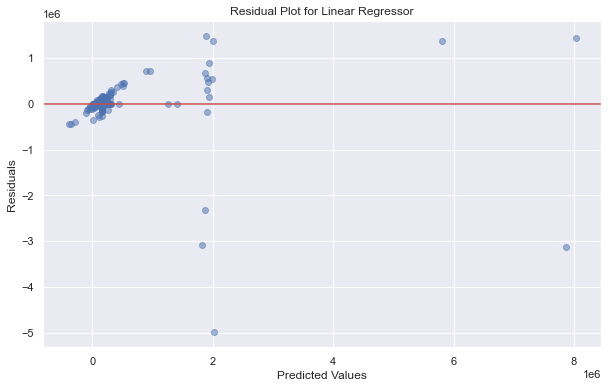

In [63]:
residuals = y_pred - y_test

plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Linear Regressor")
plt.show()

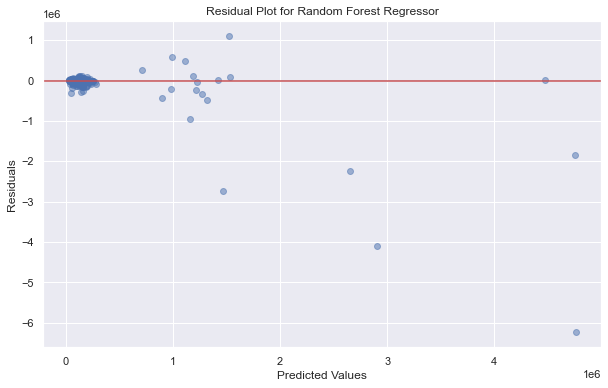

In [64]:
residuals = y_pred_RF - y_test

plt.figure(figsize=(10, 6))
plt.scatter(y_pred_RF, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residual Plot for Random Forest Regressor")
plt.show()